Frecuencias Naturales: ω₁=2.324 rad/s, ω₂=7.312 rad/s
Frecuencia de Forzamiento elegida: Ω=6.946 rad/s
Amplitudes calculadas: A₁=-0.088 rad, A₂=0.084 rad


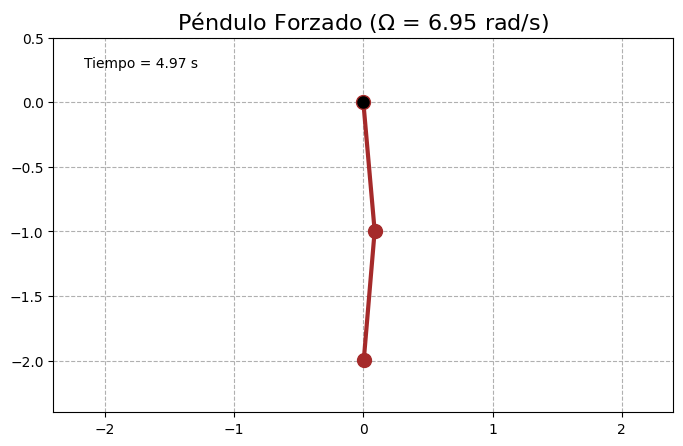

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh
from matplotlib.animation import FuncAnimation
# --- PARÁMETROS DEL SISTEMA Y LA SIMULACIÓN ---
L = 2.0      # Longitud total de la cuerda (m)
m = 2.0      # Masa total de la cuerda (kg)
M = 1.0      # Masa en el extremo (kg)
g = 9.81     # Aceleración de la gravedad (m/s^2)
F0 = 2.0     # Amplitud de la fuerza de forzamiento (N)

# Parámetros del modelo n=2
a = L / 2
m1 = m / 2
m2 = m / 2 + M

# --- CÁLCULO DE LA RESPUESTA EN FRECUENCIA ---
# Matrices T y V (sin cambios)
T_matrix = (a**2) * np.array([[m1 + m2, m2], [m2, m2]])
V_matrix = (g * a) * np.array([[m1 + m2, 0], [0, m2]])

# Frecuencias naturales (usando la función correcta de SciPy)
# Soluciona V*a = w^2*T*a
omega_sq, _ = eigh(V_matrix, T_matrix) 

omegas = np.sqrt(omega_sq)
print(f"Frecuencias Naturales: ω₁={omegas[0]:.3f} rad/s, ω₂={omegas[1]:.3f} rad/s")

# ELECCIÓN DE LA FRECUENCIA DE FORZAMIENTO (Ω)
Omega = omegas[1] * 0.95 
print(f"Frecuencia de Forzamiento elegida: Ω={Omega:.3f} rad/s")

# Vector de fuerza generalizada Q0
Q0 = a * F0 * np.array([1.0, 1.0])

# Resolvemos para las amplitudes A = [A1, A2]
K_dyn = V_matrix - (Omega**2) * T_matrix
A = np.linalg.solve(K_dyn, Q0)
print(f"Amplitudes calculadas: A₁={A[0]:.3f} rad, A₂={A[1]:.3f} rad")

# ... (El resto del código de la animación no necesita cambios) ...

# --- CONFIGURACIÓN DE LA ANIMACIÓN ---
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_xlim(-L*1.2, L*1.2)
ax.set_ylim(-L*1.2, 0.5)
ax.set_aspect('equal')
ax.grid(True, linestyle='--')
ax.set_title(f'Péndulo Forzado ($\Omega$ = {Omega:.2f} rad/s)', fontsize=16)

line, = ax.plot([], [], 'o-', lw=3, markersize=10, color='brown')
pivot, = ax.plot([0], [0], 'ko', markersize=8)
time_text = ax.text(0.05, 0.95, '', transform=ax.transAxes, verticalalignment='top')

def init():
    line.set_data([], [])
    time_text.set_text('')
    return line, time_text

def update(frame):
    t = frame / 30.0
    theta1 = A[0] * np.cos(Omega * t)
    theta2 = A[1] * np.cos(Omega * t)
    x1 = a * np.sin(theta1)
    y1 = -a * np.cos(theta1)
    x2 = x1 + a * np.sin(theta2)
    y2 = y1 - a * np.cos(theta2)
    line.set_data([0, x1, x2], [0, y1, y2])
    time_text.set_text(f'Tiempo = {t:.2f} s')
    return line, time_text

num_frames = 5 * 30 
ani = FuncAnimation(fig, update, frames=num_frames,
                    init_func=init, blit=True, interval=1000/30)



ani.save('animacion_forzada.gif', writer='pillow', fps=30)
ani.save('animacion_forzada.mp4', writer='ffmpeg', fps=30, dpi=150)



Frecuencias Naturales: ω₁=2.257 rad/s, ω₂=11.500 rad/s

Forma de los Modos (vectores A):
Modo 1 (ω₁): A₁ = [-0.19258751 -0.20801829]
Modo 2 (ω₂): A₂ = [-0.9812798   1.05990332]


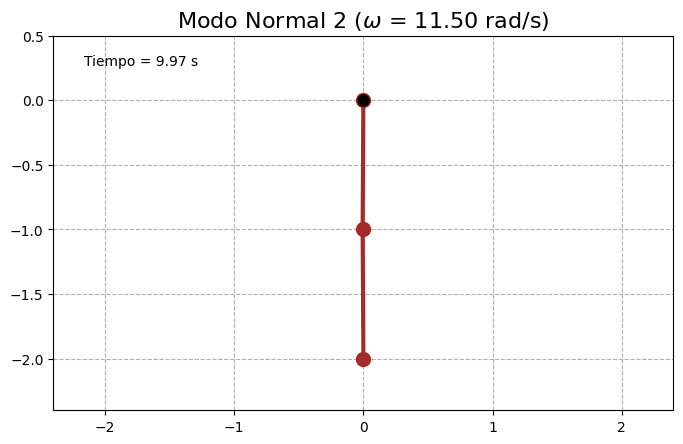

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from scipy.linalg import eigh

# --- PARÁMETROS DEL SISTEMA (Basado en el Proyecto 1) ---
L = 2.0      # Longitud total de la cuerda (m)
m = 2.0      # Masa total de la cuerda (kg)
M = 5.0      # Masa en el extremo (kg)
g = 9.81     # Aceleración de la gravedad (m/s^2)

# Parámetros del modelo discreto n=2
a = L / 2
m1 = m / 2
m2_prime = m / 2 + M # Se usa m2_prime para claridad (m_2' en la deducción)

# --- MATRICES DE ENERGÍA (T y V) ---
# Basado en la deducción explícita del péndulo doble
T_matrix = (a**2) * np.array([
    [m1 + m2_prime, m2_prime],
    [m2_prime,      m2_prime]
])

V_matrix = (g * a) * np.array([
    [m1 + m2_prime, 0],
    [0,             m2_prime]
])

# --- CÁLCULO DE MODOS NORMALES Y FRECUENCIAS ---
# Resuelve el problema generalizado de eigenvalores: V*A = w^2*T*A
omega_sq, modos = eigh(V_matrix, T_matrix) 

# Las columnas de la matriz 'modos' son los vectores de modo normal (A)
omegas = np.sqrt(omega_sq)
print(f"Frecuencias Naturales: ω₁={omegas[0]:.3f} rad/s, ω₂={omegas[1]:.3f} rad/s")
print("\nForma de los Modos (vectores A):")
print(f"Modo 1 (ω₁): A₁ = {modos[:, 0]}")
print(f"Modo 2 (ω₂): A₂ = {modos[:, 1]}")


# --- CONFIGURACIÓN DE LA ANIMACIÓN ---

# Elige qué modo normal quieres ver (0 para el primero, 1 para el segundo)
MODO_A_ANIMAR = 1 

omega_anim = omegas[MODO_A_ANIMAR]
modo_shape = modos[:, MODO_A_ANIMAR]

# Amplitud de la oscilación para la visualización (en radianes)
# La amplitud real dependería de las condiciones iniciales
AMP_PLOT = 0.1 

# Configuración del gráfico (idéntico al anterior)
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_xlim(-L*1.2, L*1.2)
ax.set_ylim(-L*1.2, 0.5)
ax.set_aspect('equal')
ax.grid(True, linestyle='--')
ax.set_title(f'Modo Normal {MODO_A_ANIMAR + 1} ($\omega$ = {omega_anim:.2f} rad/s)', fontsize=16)

line, = ax.plot([], [], 'o-', lw=3, markersize=10, color='brown')
pivot, = ax.plot([0], [0], 'ko', markersize=8)
time_text = ax.text(0.05, 0.95, '', transform=ax.transAxes, verticalalignment='top')

def init():
    """Función de inicialización para la animación."""
    line.set_data([], [])
    time_text.set_text('')
    return line, time_text

def update(frame):
    """Función que actualiza cada cuadro de la animación."""
    t = frame / 30.0
    
    # La solución para un modo normal es A * cos(ω*t)
    # Theta(t) = Amplitud * [forma_del_modo] * cos(ω*t)
    theta1 = AMP_PLOT * modo_shape[0] * np.cos(omega_anim * t)
    theta2 = AMP_PLOT * modo_shape[1] * np.cos(omega_anim * t)
    
    # Coordenadas (y-axis apunta hacia arriba)
    x1 = a * np.sin(theta1)
    y1 = -a * np.cos(theta1)
    x2 = x1 + a * np.sin(theta2)
    y2 = y1 - a * np.cos(theta2)
    
    line.set_data([0, x1, x2], [0, y1, y2])
    time_text.set_text(f'Tiempo = {t:.2f} s')
    return line, time_text

# --- GENERACIÓN Y GUARDADO DE LA ANIMACIÓN ---
num_frames = 10 * 30 # 10 segundos de animación
ani = FuncAnimation(fig, update, frames=num_frames,
                    init_func=init, blit=True, interval=1000/30)

# Guardar la animación (necesita tener 'pillow' y/o 'ffmpeg' instalado)
output_filename = f'animacion_modo_{MODO_A_ANIMAR + 1}'
ani.save(output_filename + '.gif', writer='pillow', fps=30)
# ani.save(output_filename + '.mp4', writer='ffmpeg', fps=30, dpi=150)

plt.show()

Frecuencias naturales: ω₁ = 2.324 rad/s, ω₂ = 7.312 rad/s
Frecuencia de forzamiento: Ω = 6.946 rad/s
Amplitudes: A₁ = -0.088 rad, A₂ = 0.084 rad


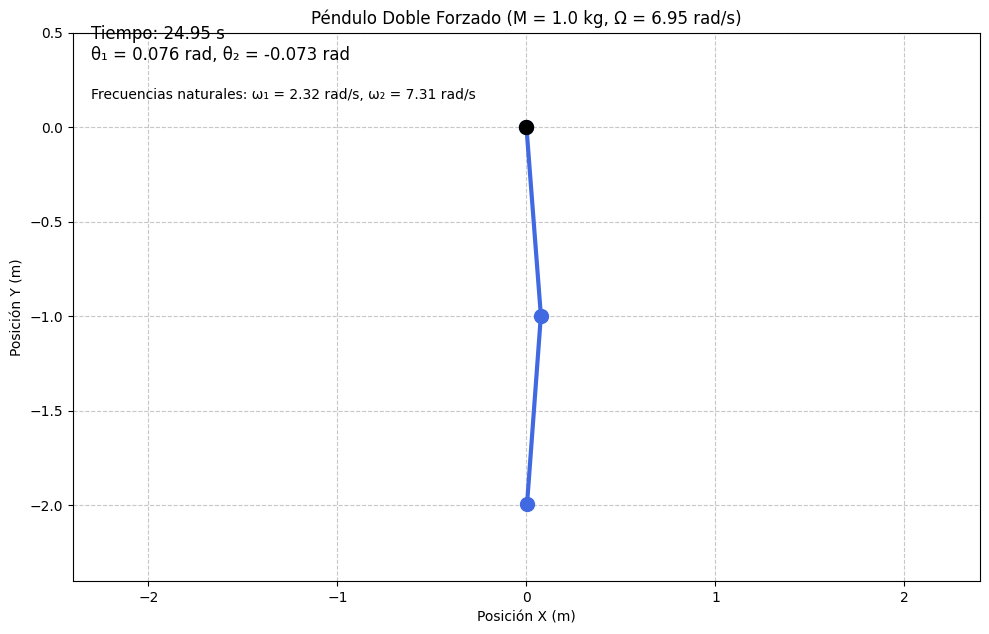

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from scipy.linalg import eigh

# --- PARÁMETROS DEL SISTEMA ---
L = 2.0      # Longitud total de la cuerda (m)
m = 2.0      # Masa total de la cuerda (kg)
M = 1.0      # Masa en el extremo (kg)
g = 9.81     # Aceleración de la gravedad (m/s²)
F0 = 2.0     # Amplitud de la fuerza de forzamiento (N)
l = L / 2    # Longitud de cada péndulo

# Masas equivalentes
m1 = m / 2       # Masa del primer péndulo
m2_prime = m/2 + M  # Masa efectiva del segundo péndulo (incluye M)

# --- MATRICES T Y V SEGÚN DEDUCCIÓN ---
# Matriz de energía cinética T
T_matrix = (l**2) * np.array([
    [m1 + m2_prime, m2_prime],
    [m2_prime,       m2_prime]
])

# Matriz de energía potencial V
V_matrix = (g * l) * np.array([
    [m1 + m2_prime, 0],
    [0,              m2_prime]
])

# --- CÁLCULO DE FRECUENCIAS NATURALES ---
# Resolver problema de autovalores generalizado: V·a = ω²·T·a
omega_sq, modes = eigh(V_matrix, T_matrix) 
omegas = np.sqrt(omega_sq)
print(f"Frecuencias naturales: ω₁ = {omegas[0]:.3f} rad/s, ω₂ = {omegas[1]:.3f} rad/s")

# --- CONFIGURACIÓN DE FORZAMIENTO ---
Omega = omegas[1] * 0.95  # Frecuencia cerca de ω₂
print(f"Frecuencia de forzamiento: Ω = {Omega:.3f} rad/s")

# Vector de fuerza generalizada (mismo que ejemplo)
Q0 = l * F0 * np.array([1.0, 1.0])

# --- CÁLCULO DE AMPLITUDES ---
# Matriz dinámica: K_dyn = V - Ω²·T
K_dyn = V_matrix - (Omega**2) * T_matrix

# Resolver: K_dyn·A = Q0
A = np.linalg.solve(K_dyn, Q0)
print(f"Amplitudes: A₁ = {A[0]:.3f} rad, A₂ = {A[1]:.3f} rad")

# --- ANIMACIÓN ---
fig, ax = plt.subplots(figsize=(10, 8))
ax.set_xlim(-L*1.2, L*1.2)
ax.set_ylim(-L*1.2, 0.5)
ax.set_aspect('equal')
ax.grid(True, linestyle='--', alpha=0.7)
ax.set_title(f'Péndulo Doble Forzado (M = {M} kg, Ω = {Omega:.2f} rad/s)')
ax.set_xlabel('Posición X (m)')
ax.set_ylabel('Posición Y (m)')

line, = ax.plot([], [], 'o-', lw=3, markersize=10, color='royalblue')
pivot = ax.plot(0, 0, 'ko', markersize=10)[0]
time_text = ax.text(0.02, 0.95, '', transform=ax.transAxes, fontsize=12)
info_text = ax.text(0.02, 0.88, '', transform=ax.transAxes, fontsize=10)

def init():
    line.set_data([], [])
    time_text.set_text('')
    info_text.set_text(f'Frecuencias naturales: ω₁ = {omegas[0]:.2f} rad/s, ω₂ = {omegas[1]:.2f} rad/s')
    return line, time_text, info_text

def update(frame):
    t = frame * 0.05  # Paso de tiempo
    
    # Ángulos (solución forzada)
    theta1 = A[0] * np.cos(Omega * t)
    theta2 = A[1] * np.cos(Omega * t)
    
    # Posiciones de las masas
    x1 = l * np.sin(theta1)
    y1 = -l * np.cos(theta1)
    x2 = x1 + l * np.sin(theta2)
    y2 = y1 - l * np.cos(theta2)
    
    # Actualizar línea
    line.set_data([0, x1, x2], [0, y1, y2])
    time_text.set_text(f'Tiempo: {t:.2f} s\n'
                      f'θ₁ = {theta1:.3f} rad, θ₂ = {theta2:.3f} rad')
    return line, time_text, pivot

# Configuración de animación
ani = FuncAnimation(fig, update, frames=500,
                    init_func=init, blit=True, interval=20)

# Guardar animación (opcional)
ani.save('pendulo_forzado_n2.gif', writer='pillow', fps=25)
# ani.save('pendulo_forzado_n2.mp4', writer='ffmpeg', fps=25, dpi=150)

plt.tight_layout()
plt.show()

Frecuencias Naturales (n=3):
  ω₁ = 3.143 rad/s
  ω₂ = 42.886 rad/s
  ω₃ = 74.020 rad/s

Frecuencia de Forzamiento elegida: Ω = 73.280 rad/s
Amplitudes calculadas: A₁=0.012, A₂=-0.023, A₃=0.010 rad


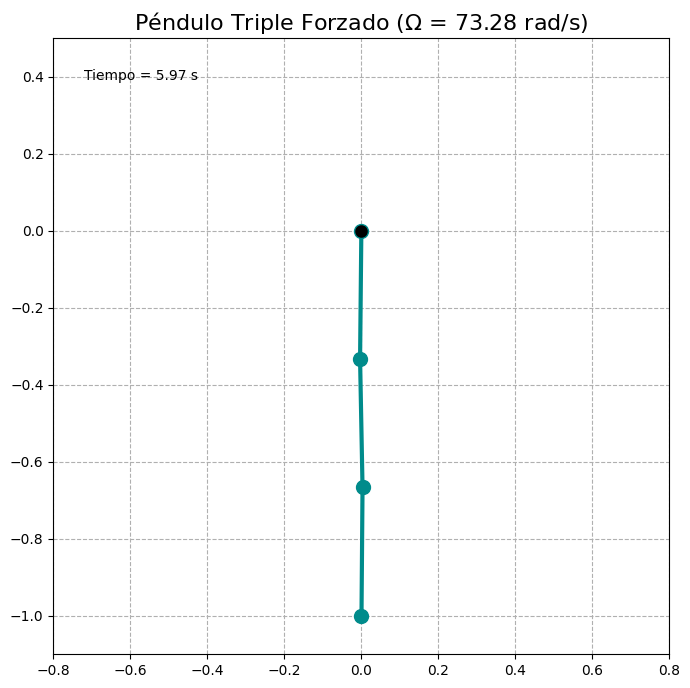

In [3]:
# --- PARÁMETROS DEL SISTEMA (n=3) ---
L = 1.0      # Longitud total de la cuerda (m)
m = 0.1      # Masa total de la cuerda (kg)
M = 2.0      # Masa en el extremo (kg)
g = 9.81     # Aceleración de la gravedad (m/s^2)
F0 = 5.0     # Amplitud de la fuerza de forzamiento (N)

# Parámetros del modelo n=3
a = L / 3.0
m1 = m / 3.0
m2 = m / 3.0
m3 = m / 3.0 + M

# --- CÁLCULO DE LA RESPUESTA EN FRECUENCIA ---
# Construcción de las matrices T y V para n=3
T_matrix = (a**2) * np.array([
    [m1 + m2 + m3, m2 + m3, m3],
    [m2 + m3,      m2 + m3, m3],
    [m3,           m3,      m3]
])

V_matrix = (g * a) * np.array([
    [m1 + m2 + m3, 0,          0],
    [0,            m2 + m3,    0],
    [0,            0,          m3]
])

# Frecuencias naturales (ahora son 3)
omega_sq, _ = eigh(V_matrix, T_matrix)
omegas = np.sqrt(omega_sq)
print("Frecuencias Naturales (n=3):")
print(f"  ω₁ = {omegas[0]:.3f} rad/s")
print(f"  ω₂ = {omegas[1]:.3f} rad/s")
print(f"  ω₃ = {omegas[2]:.3f} rad/s")

# ELECCIÓN DE LA FRECUENCIA DE FORZAMIENTO (Ω)
# Elegimos una frecuencia cercana a la tercera resonancia
Omega = omegas[2] * 0.99
print(f"\nFrecuencia de Forzamiento elegida: Ω = {Omega:.3f} rad/s")

# Vector de fuerza generalizada Q0 para n=3
Q0 = a * F0 * np.array([1.0, 1.0, 1.0])

# Resolvemos para las amplitudes A = [A1, A2, A3]
K_dyn = V_matrix - (Omega**2) * T_matrix
A = np.linalg.solve(K_dyn, Q0)
print(f"Amplitudes calculadas: A₁={A[0]:.3f}, A₂={A[1]:.3f}, A₃={A[2]:.3f} rad")


# --- CONFIGURACIÓN DE LA ANIMACIÓN ---
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_xlim(-L*0.8, L*0.8)
ax.set_ylim(-L*1.1, 0.5)
ax.set_aspect('equal')
ax.grid(True, linestyle='--')
ax.set_title(f'Péndulo Triple Forzado ($\Omega$ = {Omega:.2f} rad/s)', fontsize=16)

# Elementos del gráfico que se actualizarán
line, = ax.plot([], [], 'o-', lw=3, markersize=10, color='darkcyan')
pivot, = ax.plot([0], [0], 'ko', markersize=8)
time_text = ax.text(0.05, 0.95, '', transform=ax.transAxes, verticalalignment='top')

def init():
    line.set_data([], [])
    time_text.set_text('')
    return line, time_text

def update(frame):
    t = frame / 30.0
    
    # Calcular los tres ángulos
    theta1 = A[0] * np.cos(Omega * t)
    theta2 = A[1] * np.cos(Omega * t)
    theta3 = A[2] * np.cos(Omega * t)
    
    # Calcular las coordenadas cartesianas de las 3 masas
    x1 = a * np.sin(theta1)
    y1 = -a * np.cos(theta1)
    
    x2 = x1 + a * np.sin(theta2)
    y2 = y1 - a * np.cos(theta2)
    
    x3 = x2 + a * np.sin(theta3)
    y3 = y2 - a * np.cos(theta3)
    
    # Actualizar los datos de la línea (ahora con 4 puntos)
    line.set_data([0, x1, x2, x3], [0, y1, y2, y3])
    time_text.set_text(f'Tiempo = {t:.2f} s')
    
    return line, time_text

# --- CREAR Y GUARDAR LA ANIMACIÓN ---
num_frames = 6 * 30  # Animamos por 6 segundos
ani = FuncAnimation(fig, update, frames=num_frames,
                    init_func=init, blit=True, interval=1000/30)


ani.save('animacion_forzada_n3.gif', writer='pillow', fps=30)
ani.save('animacion_forzada_n3.mp4', writer='ffmpeg', fps=30, dpi=150)

